In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mostafaabla/garbage-classification")

print("Path to dataset files:", path)

100%|██████████| 239M/239M [00:11<00:00, 21.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1


In [4]:
import shutil

src = "/root/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1"

dest = "/content/Dataset"

shutil.move(src,dest)

'/content/Dataset'

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
dir = '/content/Dataset/1/garbage_classification'

In [7]:
data = tf.keras.utils.image_dataset_from_directory('/content/Dataset/garbage_classification', batch_size = 8, label_mode = "int", labels = "inferred")

Found 15515 files belonging to 12 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
data.as_numpy_iterator().next()

(array([[[[ 41.2063  ,  40.2063  ,  35.2063  ],
          [ 38.37561 ,  37.37561 ,  32.37561 ],
          [ 38.493652,  37.493652,  32.493652],
          ...,
          [ 40.846497,  39.846497,  34.846497],
          [ 32.3537  ,  31.353699,  26.353699],
          [ 53.29065 ,  52.29065 ,  47.29065 ]],
 
         [[ 34.62909 ,  33.62909 ,  28.62909 ],
          [ 39.70105 ,  38.70105 ,  33.70105 ],
          [ 32.52899 ,  31.528992,  26.528992],
          ...,
          [ 41.593872,  40.593872,  35.593872],
          [ 41.676025,  40.676025,  35.676025],
          [ 36.21582 ,  35.21582 ,  30.21582 ]],
 
         [[ 38.53241 ,  37.53241 ,  32.53241 ],
          [ 31.983276,  30.983276,  25.983276],
          [ 42.018738,  41.018738,  36.018738],
          ...,
          [ 31.178955,  30.178955,  25.178955],
          [ 37.354004,  36.354004,  31.354004],
          [ 38.746582,  37.746582,  32.746582]],
 
         ...,
 
         [[ 33.284546,  32.284546,  27.284546],
          [ 32.242

In [10]:
import cv2

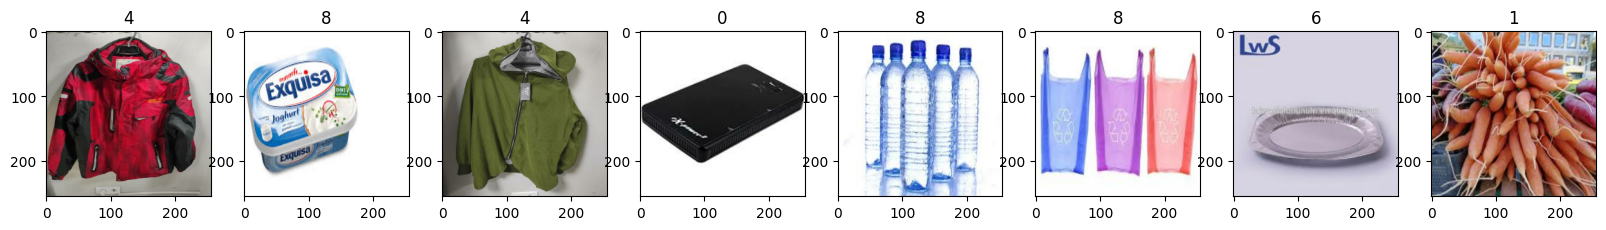

In [11]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int), cmap = 'gist_rainbow')
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.8602941 , 0.8759804 , 0.9191176 ],
          [0.85882354, 0.8745098 , 0.91764706],
          [0.85490197, 0.87058824, 0.9137255 ],
          ...,
          [0.6117647 , 0.62352943, 0.6509804 ],
          [0.60784316, 0.61960787, 0.64705884],
          [0.60588235, 0.61764705, 0.64509803]],
 
         [[0.85882354, 0.8745098 , 0.91764706],
          [0.8573529 , 0.8730392 , 0.9161765 ],
          [0.85490197, 0.87058824, 0.9137255 ],
          ...,
          [0.6117647 , 0.62352943, 0.6509804 ],
          [0.60784316, 0.61960787, 0.64705884],
          [0.60588235, 0.61764705, 0.64509803]],
 
         [[0.85784316, 0.87352943, 0.9166667 ],
          [0.85490197, 0.87058824, 0.9137255 ],
          [0.85245097, 0.86813724, 0.9112745 ],
          ...,
          [0.6117647 , 0.62352943, 0.6509804 ],
          [0.60784316, 0.61960787, 0.64705884],
          [0.60588235, 0.61764705, 0.64509803]],
 
         ...,
 
         [[0.85294116, 0.8607843 , 0.9078431 ],
          [0.85098

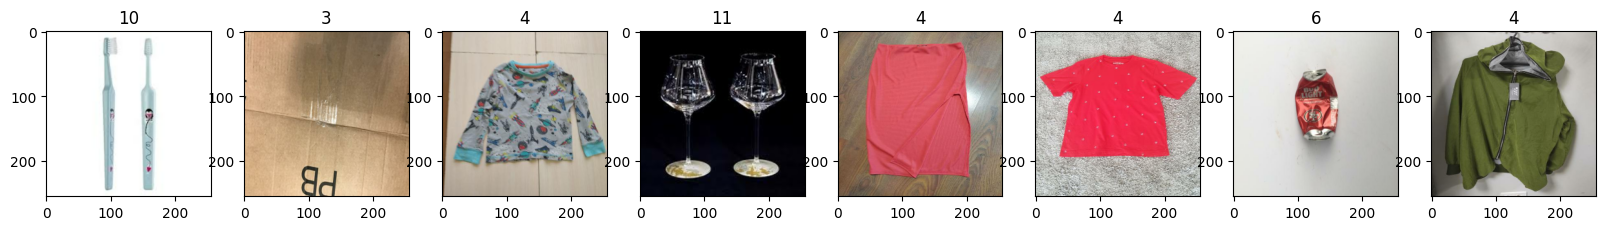

In [17]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(float))

    ax[idx].title.set_text(batch[1][idx])

In [18]:
batch[0].max()

1.0

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
test_size + val_size + train_size

1940

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2

In [24]:
import keras.layers
from tensorflow.keras import layers

In [122]:
model = Sequential()

In [123]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomContrast(0.1),
    layers.RandomZoom(0.1)
  ]
)

In [95]:
from tensorflow.keras.regularizers import l1_l2

In [124]:
model.add(data_augmentation)

model.add(Conv2D(
    filters=33,  # Based on the tuning result
    kernel_size=(7, 7),  # Kernel size from the results
    activation='relu',

    input_shape=(256, 256, 3)
))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu',))

model.add(Dense(12, activation='softmax'))
#model.add(Dense(2, activation = 'softmax'))

In [125]:
from tensorflow.keras.optimizers import Adam
# Set a custom learning rate for the optimizer
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [126]:
model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [127]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [128]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback,])

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 122s 88ms/step - accuracy: 0.4641 - loss: 3.0901 - val_accuracy: 0.4807 - val_loss: 2.0726
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 124s 91ms/step - accuracy: 0.5922 - loss: 1.2966 - val_accuracy: 0.6231 - val_loss: 1.2366
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 119s 87ms/step - accuracy: 0.6341 - loss: 1.1651 - val_accuracy: 0.6169 - val_loss: 1.2564
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 119s 88ms/step - accuracy: 0.6727 - loss: 1.0591 - val_accuracy: 0.5905 - val_loss: 1.4604
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 118s 87ms/step - accuracy: 0.6904 - loss: 0.9963 - val_accuracy: 0.5557 - val_loss: 2.0703
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 119s 87ms/step - accuracy: 0.7086 - loss: 0.9191 - val_accuracy: 0.5718 - val_loss: 1.7228
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 88ms/step - accuracy: 0.7361 - loss: 0.8456 - val_accuracy: 0.6215 - val_loss: 1.5100
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 119s 88ms/step - accuracy: 

In [129]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_19 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 250, 250, 33)        │           4,884 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 250, 250, 33)        │             132 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 125, 125, 33)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 125, 125, 33)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 515625)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │      66,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,019,946 (755.39 MB)

 Trainable params: 66,006,626 (251.80 MB)

 Non-trainable params: 66 (264.00 B)

 Optimizer params: 132,013,254 (503.59 MB)

In [ ]:
model.get_build_config()
model.get_config()

{'name': 'sequential_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d_2',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registe

In [ ]:
loss.get_config()

NameError: name 'loss' is not defined

In [131]:
from tensorflow.keras.models import load_model
model.save(os.path.join("/content/Dataset", "new.h5"))
new_model = load_model("/content/Dataset/new.h5")

<Sequential name=sequential_18, built=True>

In [134]:
model.compile_metrics()

AttributeError: 'Sequential' object has no attribute 'compile_metrics'

In [132]:
new_model = load_model("/content/Dataset/new.h5")

In [ ]:
hist = keras.src.callbacks.history.History.on_train_begin

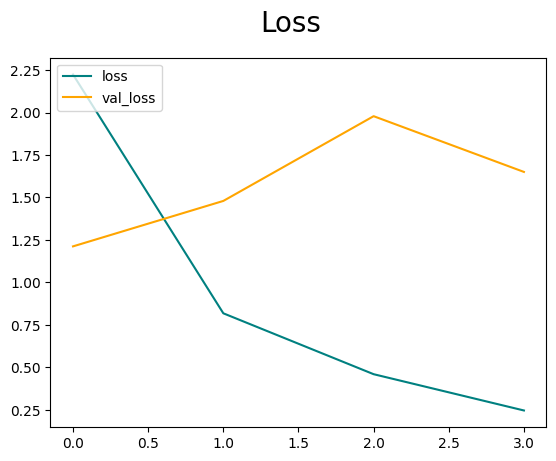

In [108]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

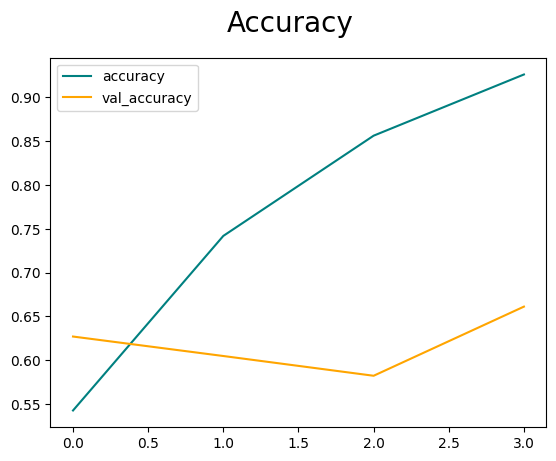

In [109]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#fake1
#real0

In [ ]:
CONTENT = "/content/Dataset/1/garbage_classification/battery/battery1.jpg"

In [ ]:
import cv2
#img = cv2.cvtColor((cv2.imread('/content/Dataset/2/real_vs_fake/real-vs-fake/test/real/06990.jpg')), cv2.COLOR_BGR2RGB)
imga = cv2.imread(CONTENT)


resize = tf.image.resize(imga, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
yhat.max()


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

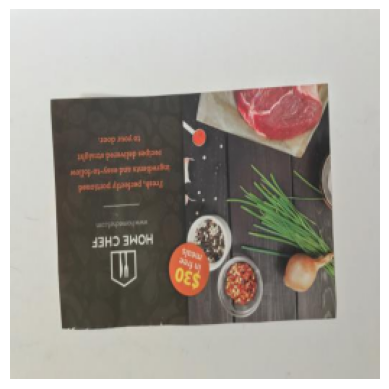

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Raw model output: [[0.17729393 0.016944   0.03761869 0.06445764 0.02613557 0.02829419
  0.12084128 0.35188875 0.04212216 0.08242059 0.00442621 0.047557  ]]
Predicted class: 7


In [142]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'image_path' with your actual image path)
image_path = '/content/Dataset/garbage_classification/paper/paper1005.jpg'
img = cv2.imread(image_path)

# Convert BGR to RGB (as OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor((img), cv2.COLOR_BGR2RGB)
#img_rgb = img

# Resize the image to the input shape of the model (256x256 in this case)
resize = tf.image.resize(img_rgb, (256, 256))

# Display the image
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

# Preprocess the image: normalize pixel values by dividing by 255
img_preprocessed = resize / 255.0

# Expand dimensions to create a batch of size 1
img_batch = np.expand_dims(img_preprocessed, axis=0)

# Make a prediction
yhat = new_model.predict(img_batch)
print("Raw model output:", yhat)

# Get the predicted class
predicted_class = np.argmax(yhat)
print("Predicted class:", predicted_class)


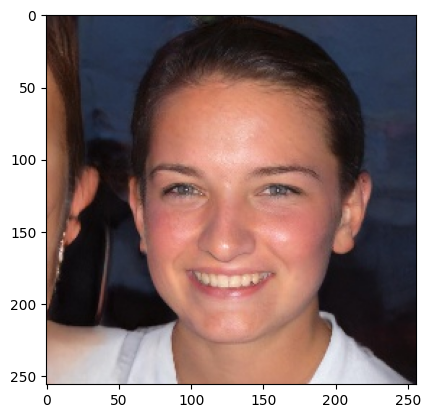

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.26007912]], dtype=float32)

In [ ]:
import cv2
img = cv2.cvtColor((cv2.imread(CONTENT)), cv2.COLOR_BGR2RGB)



resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,495,430 (360.47 MB)

 Trainable params: 31,498,476 (120.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,996,954 (240.31 MB)

In [ ]:
model.get_build_config()

{'input_shape': (None, 256, 256, 3)}

In [ ]:
model.build_from_config()

TypeError: Model.build_from_config() missing 1 required positional argument: 'config'

In [ ]:
model.get_config()

{'name': 'sequential_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras',
   'class_name': 'Sequential',
   'config': {'name': 'sequential_4',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'layers': [{'module': 'keras.layers',
      'class_name': 'InputLayer',
      'config': {'batch_shape': (None, 256, 256, 3),
       'dtype': 'float32',
       'sparse': False,
       'name': 'input_layer_2'},
      'registered_name': None},
     {'module': 'keras.layers',
      'class_name': 'RandomFlip',
      'config': {'name': 'random_flip_2',
       '

In [ ]:
model.save('new.keras')

TypeError: SparseCategoricalCrossentropy.get_config() missing 1 required positional argument: 'self'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_model = keras.models.load_model('/content/mymodel.keras')

ValueError: File not found: filepath=/content/mymodel.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
os.path.join('/content/mymodel.keras')

'/content/mymodel.keras'

In [ ]:
model.get_config()

{'name': 'sequential_4',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_5'},
   'registered_name': None},
  {'module': 'keras',
   'class_name': 'Sequential',
   'config': {'name': 'sequential_5',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'layers': [{'module': 'keras.layers',
      'class_name': 'InputLayer',
      'config': {'batch_shape': (None, 256, 256, 3),
       'dtype': 'float32',
       'sparse': False,
       'name': 'input_layer_4'},
      'registered_name': None},
     {'module': 'keras.layers',
      'class_name': 'RandomFlip',
      'config': {'name': 'random_flip_2',
       '

In [ ]:
model.save_weights('/content/mymodel.weights.h5')